#  Exploratory Data Analysis on Daily Climate Data
This notebook performs a comprehensive EDA on the cleaned daily climate dataset.

Shape of data: (883128, 26)
Columns: ['date', 'district', 'latitude', 'longitude', 'precip', 'pressure', 'humidity_2m', 'rh_2m', 'temp_2m', 'wetbulbtemp_2m', 'maxtemp_2m', 'mintemp_2m', 'temprange_2m', 'earthskintemp', 'windspeed_10m', 'maxwindspeed_10m', 'minwindspeed_10m', 'windspeedrange_10m', 'windspeed_50m', 'maxwindspeed_50m', 'minwindspeed_50m', 'windspeedrange_50m', 'year', 'month', 'day', 'season']
                                date       latitude      longitude  \
count                         883128  883128.000000  883128.000000   
mean   2000-07-01 12:00:00.000000256      27.959677      84.277419   
min              1981-01-01 00:00:00      26.500000      80.200000   
25%              1990-10-01 18:00:00      27.300000      82.400000   
50%              2000-07-01 12:00:00      27.950000      84.300000   
75%              2010-04-01 06:00:00      28.500000      85.900000   
max              2019-12-31 00:00:00      30.000000      87.900000   
std                          

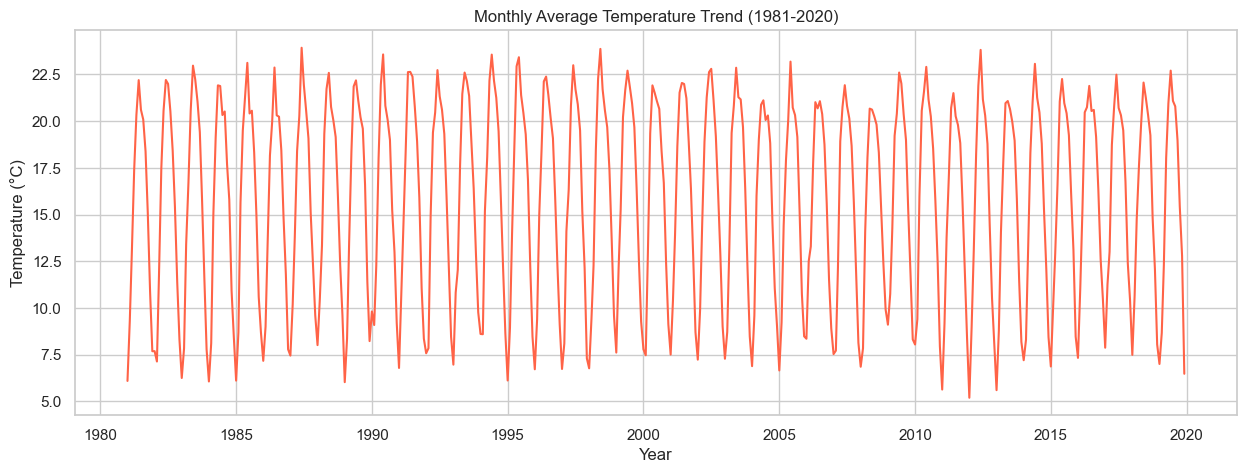

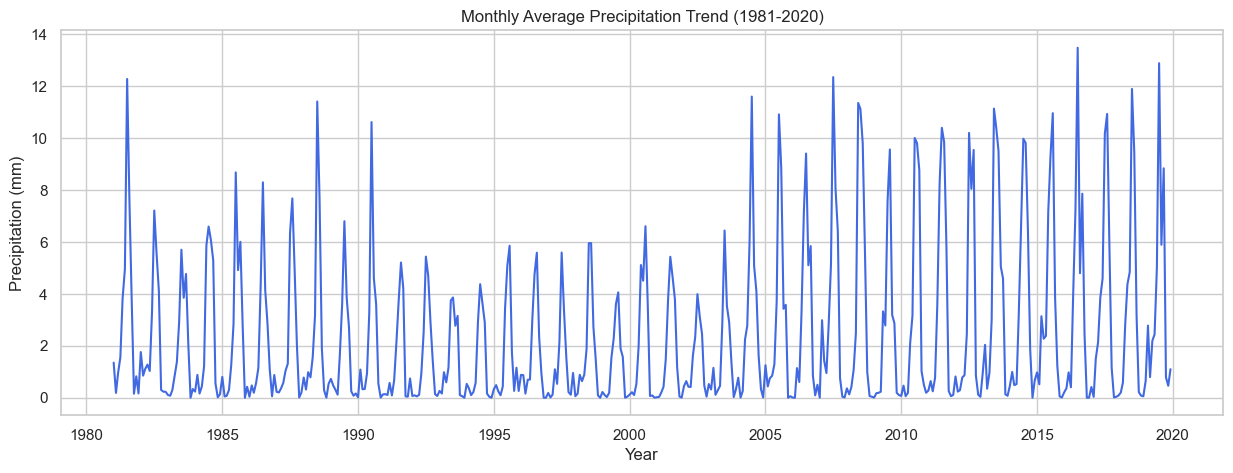

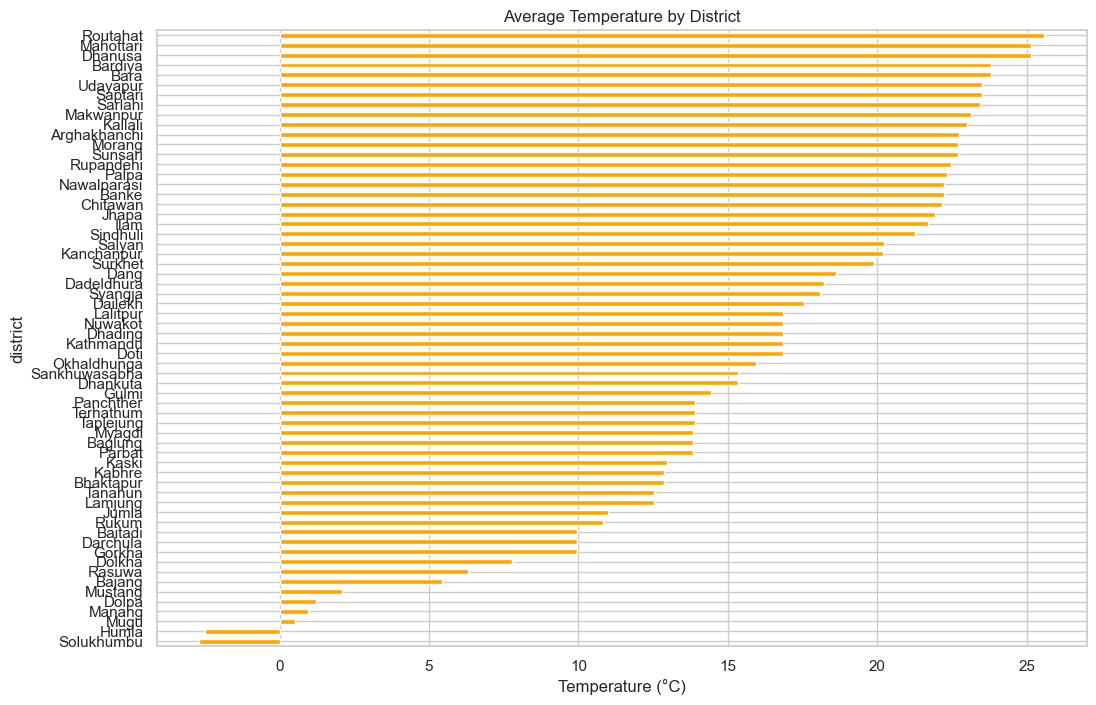

High Temp Events: 43946
High Precipitation Events: 44155


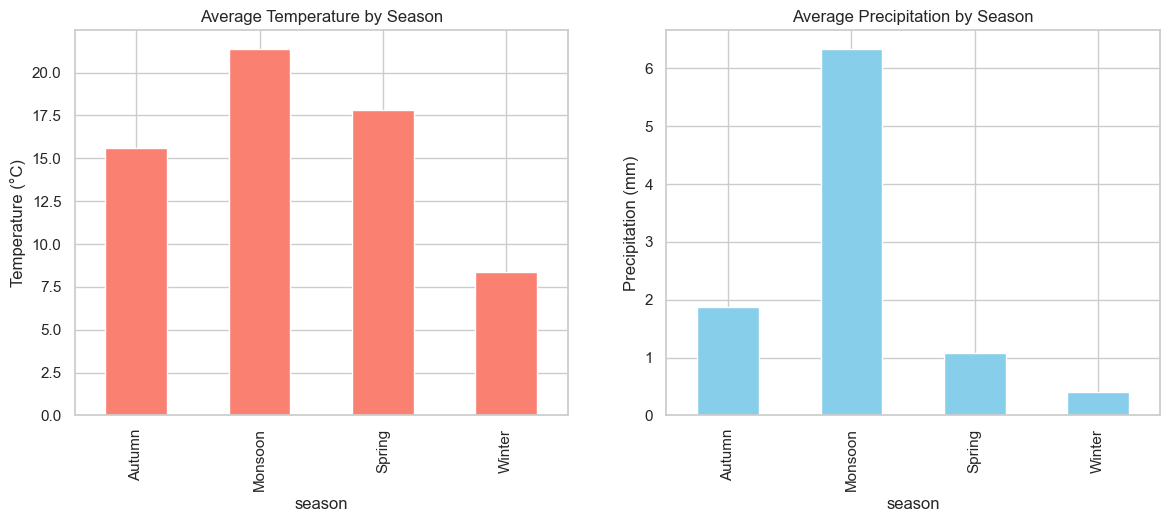

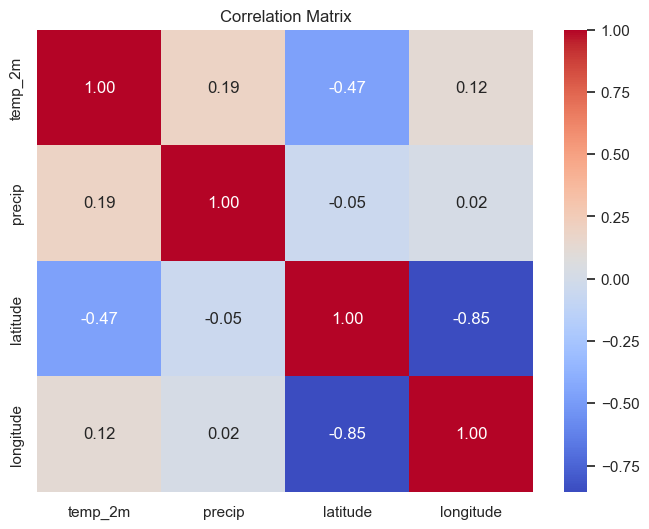

       district  latitude  longitude    temp_2m    precip
0  Arghakhanchi      27.9       83.2  22.726329  3.028853
1       Baglung      28.3       83.6  13.834550  2.787923
2       Baitadi      29.5       80.5   9.950737  1.601415
3        Bajang      29.6       81.2   5.444005  1.340441
4         Banke      28.1       81.7  22.249311  2.871878
✅ EDA Completed Successfully!


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('../../data/processed/dailyclimate_cleaned.csv')
df['date'] = pd.to_datetime(df['date'])  # ensure datetime type

# Set style
sns.set(style="whitegrid")

# 1. Data Overview
print("Shape of data:", df.shape)
print("Columns:", df.columns.tolist())
print(df.describe())

# 2. Temperature Trend Over Time
monthly_temp = df.groupby(df['date'].dt.to_period('M'))['temp_2m'].mean()
monthly_temp.index = monthly_temp.index.to_timestamp()

plt.figure(figsize=(15,5))
plt.plot(monthly_temp.index, monthly_temp.values, color='tomato')
plt.title('Monthly Average Temperature Trend (1981-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# 3. Precipitation Trend Over Time
# monthly_precip = df.groupby(df['date'].dt.to_period('M'))['precipitation'].mean()
monthly_precip = df.groupby(df['date'].dt.to_period('M'))['precip'].mean()

monthly_precip.index = monthly_precip.index.to_timestamp()

plt.figure(figsize=(15,5))
plt.plot(monthly_precip.index, monthly_precip.values, color='royalblue')
plt.title('Monthly Average Precipitation Trend (1981-2020)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# 4. District-Wise Average Temperature
district_avg_temp = df.groupby('district')['temp_2m'].mean().sort_values()

plt.figure(figsize=(12,8))
district_avg_temp.plot(kind='barh', color='orange')
plt.title('Average Temperature by District')
plt.xlabel('Temperature (°C)')
plt.show()

# 5. Extreme Weather Detection
# Top 5% highest temperatures
high_temp_days = df[df['temp_2m'] > df['temp_2m'].quantile(0.95)]

# Top 5% highest precipitation
high_precip_days = df[df['precip'] > df['precip'].quantile(0.95)]

print("High Temp Events:", high_temp_days.shape[0])
print("High Precipitation Events:", high_precip_days.shape[0])

# 6. Seasonal Analysis
seasonal_temp = df.groupby('season')['temp_2m'].mean()
seasonal_precip = df.groupby('season')['precip'].mean()

fig, ax = plt.subplots(1, 2, figsize=(14,5))
seasonal_temp.plot(kind='bar', ax=ax[0], color='salmon')
ax[0].set_title('Average Temperature by Season')
ax[0].set_ylabel('Temperature (°C)')

seasonal_precip.plot(kind='bar', ax=ax[1], color='skyblue')
ax[1].set_title('Average Precipitation by Season')
ax[1].set_ylabel('Precipitation (mm)')
plt.show()

# 7. Correlation Analysis
corr = df[['temp_2m', 'precip', 'latitude', 'longitude']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 8. Geospatial Mapping Preparation
district_geo = df.groupby('district').agg({
    'latitude':'mean',
    'longitude':'mean',
    'temp_2m':'mean',
    'precip':'mean'
}).reset_index()

print(district_geo.head())

# 9. Save EDA Summary
district_geo.to_csv('../../data/processed/climateEda_cleaned.csv', index=False)

print("✅ EDA Completed Successfully!")


